In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


all_stats = pd.read_csv('../python_project_csv_files/2019-20_pbp.csv', header = [0])

pd.set_option("display.max_columns", None)

In [11]:
some_stats = all_stats[['GameType','WinningTeam','Quarter','AwayTeam','AwayPlay','HomeTeam','HomePlay','Shooter','ShotType','ShotOutcome','ShotDist']]
some_stats.head(5)
shooting = some_stats[some_stats['Shooter'].notna()].reset_index().drop(columns = 'index')
shooting['Team'] = shooting.apply(lambda row: row['AwayTeam'] if isinstance(row['AwayPlay'],str) else row['HomeTeam'], axis=1)
shooting.fillna('',inplace=True)
shooting['Play'] = shooting['AwayPlay'] + shooting['HomePlay']
shooting['ShotType'] = shooting['ShotType'].apply(lambda row: '3PT' if '3-pt' in row else '2PT')
shooting

regular_season = shooting[shooting['GameType']=='regular']
refined_df = regular_season[['Team','ShotType','ShotDist','ShotOutcome']]

fg_perc = refined_df.groupby(['ShotType','ShotDist']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome'])))
fg_perc
#two_point_shots = some_stats[some_stats['ShotType'].str.contains('2')].reset_index().drop(columns = 'index')
team_fg_perc = refined_df.groupby(['Team','ShotType']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome']))).reset_index(name='fg_percent')
fg_perc_3pt = team_fg_perc[team_fg_perc['ShotType'] == '3PT']
fg_perc_3pt['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]
fg_perc_3pt


test = refined_df.groupby('Team').apply(lambda row: (sum((row['ShotOutcome']=='make') & (row['ShotType']=='2PT'))+sum((row['ShotOutcome']=='make') & (row['ShotType']=='3PT')))/len(row['ShotOutcome'])).reset_index(name='fg_percent')
test['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]

team_efg_perc = refined_df.groupby('Team').apply(lambda row: (sum((row['ShotOutcome']=='make') & (row['ShotType']=='2PT'))+1.5*sum((row['ShotOutcome']=='make') & (row['ShotType']=='3PT')))/len(row['ShotOutcome'])).reset_index(name='efg_percent')
team_efg_perc['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]


<ipython-input-11-39b331a56c53>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_perc_3pt['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]


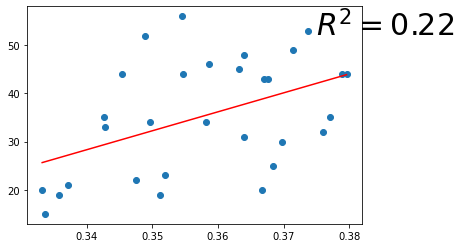

In [12]:
xd = fg_perc_3pt['fg_percent']
yd = fg_perc_3pt['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

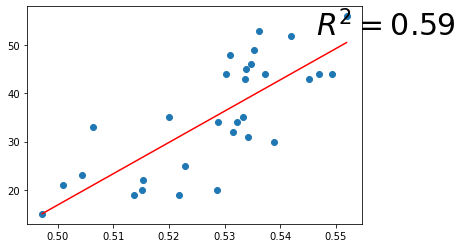

In [13]:
xd = team_efg_perc['efg_percent']
yd = team_efg_perc['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

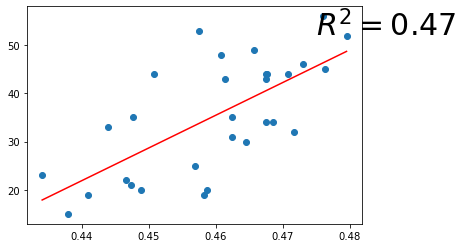

In [14]:
xd = test['fg_percent']
yd = test['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

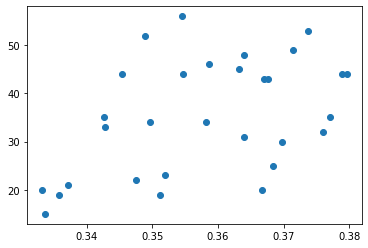

In [3]:
plt.scatter(fg_perc_3pt['fg_percent'],fg_perc_3pt['wins'])

In [4]:
shooting = some_stats[some_stats['Shooter'].notna()].reset_index().drop(columns = 'index')
shooting.head(5)

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
1,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
2,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
3,regular,TOR,1,NOP,J. Holiday misses 2-pt layup from 8 ft,TOR,NaN,J. Holiday - holidjr01,2-pt layup,miss,8.0
4,regular,TOR,1,NOP,NaN,TOR,K. Lowry misses 3-pt jump shot from 25 ft,K. Lowry - lowryky01,3-pt jump shot,miss,25.0


In [5]:
shooting['Team'] = some_stats.apply(lambda row: row['AwayTeam'] if isinstance(row['AwayPlay'],str) else row['HomeTeam'], axis=1)

In [6]:
#shooting.fillna('',inplace=True)
#shooting['Play'] = shooting["VISITORDESCRIPTION"] + older_stats["HOMEDESCRIPTION"]

In [7]:
shooting.groupby(['Team','ShotType','ShotOutcome']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome'])))


Team  ShotType        ShotOutcome
ATL   2-pt dunk       make           1.0
                      miss           0.0
      2-pt hook shot  make           1.0
                      miss           0.0
      2-pt jump shot  make           1.0
                                    ... 
WAS   2-pt jump shot  miss           0.0
      2-pt layup      make           1.0
                      miss           0.0
      3-pt jump shot  make           1.0
                      miss           0.0
Length: 300, dtype: float64

TypeError: scatter() missing 1 required positional argument: 'y'